In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\RL-CFE


C:\Users\mrefoyo\miniconda3\envs\RL-CFE_39\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
# DATASETS = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = [
    # "BasicMotions", 
    "NATOPS", "UWaveGestureLibrary",
    'ArticularyWordRecognition', 
    # 'Cricket', 'Epilepsy', 
    # 'PenDigits', 'PEMS-SF', 'RacketSports', 'SelfRegulationSCP1'
]
model_to_explain = "inceptiontime_pytorch"

In [4]:
def read_concat_results_df(datasets, model_to_explain, experiment_folder):
    df_aux = pd.DataFrame()
    for dataset in datasets:
        folder_path = f"./experiments/results/{dataset}/{model_to_explain}/{experiment_folder}"
        results_path = f"{folder_path}/concatenated_results.xlsx"
        
        df_dataset = pd.read_excel(results_path, index_col="Unnamed: 0")
        df_dataset.columns = [col.replace("algorithm_cemnn_", "") for col in df_dataset.columns]
        df_dataset["dataset"] = dataset
        df_aux = pd.concat([df_aux, df_dataset])
    return df_aux

# Selection pressure

In [5]:
experiment_folder = "hcem_grid_Search_selection_preassure"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)

In [6]:
df_aux = df_aux[
    ["dataset", "alpha", "cem_iters", "elite_frac", "num_simulations", "plan_every", "planning_credit", 
     "search_target", "ts_ch_block_pcts", "improvement_over_nun_mean"]
]

In [7]:
df_aux["hierarchical"] = df_aux["ts_ch_block_pcts"].replace("[[0.2, 0.2], [0.1, 0.2], [0.05, 0.2]]", "hierarchical")
df_aux["hierarchical"] = df_aux["hierarchical"].replace("[[0.05, 0.2]]", "finer")
df_aux["hue"] = df_aux["hierarchical"] + "_" + df_aux["planning_credit"].astype(str) + "_" + df_aux["plan_every"].astype(str)

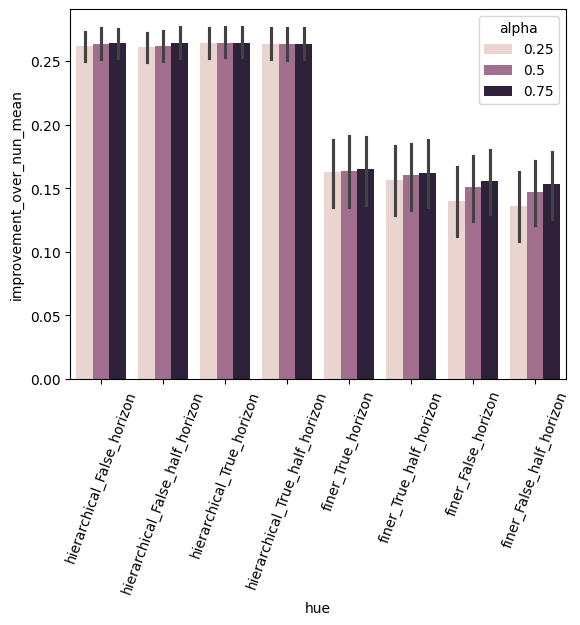

In [8]:
sns.barplot(df_aux, x="hue", y="improvement_over_nun_mean", hue="alpha")
plt.xticks(rotation=70);

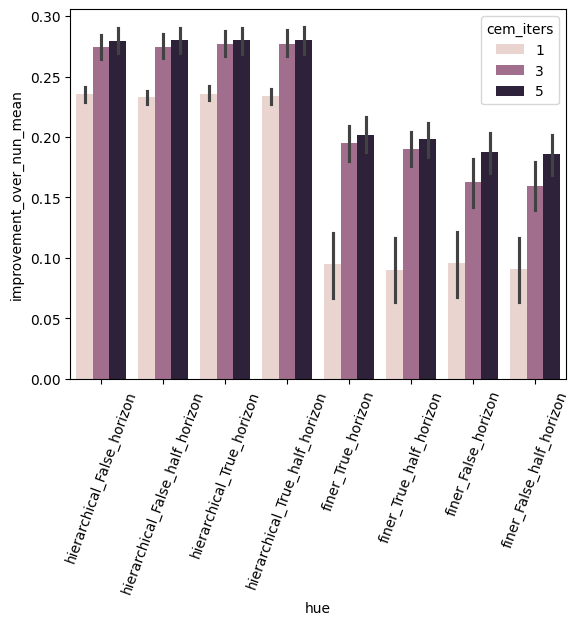

In [9]:
sns.barplot(df_aux, x="hue", y="improvement_over_nun_mean", hue="cem_iters")
plt.xticks(rotation=70);

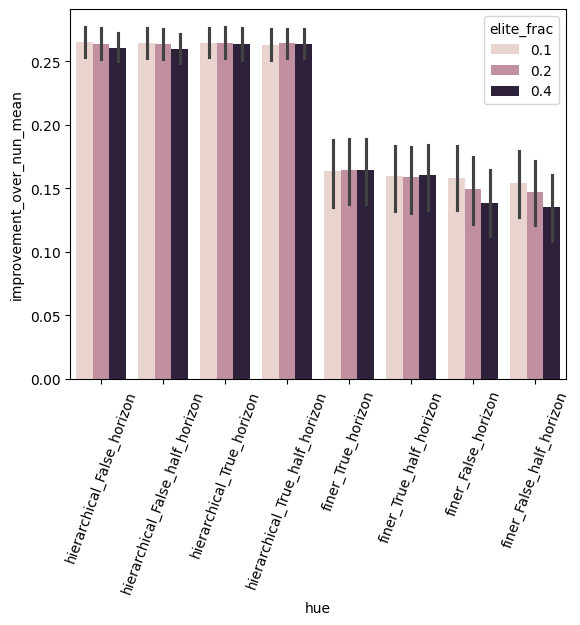

In [10]:
sns.barplot(df_aux, x="hue", y="improvement_over_nun_mean", hue="elite_frac")
plt.xticks(rotation=70);

In [11]:
df_aux_hierarchical_false = df_aux[df_aux["hue"] == "hierarchical_False_half_horizon"]

<Axes: xlabel='dataset', ylabel='improvement_over_nun_mean'>

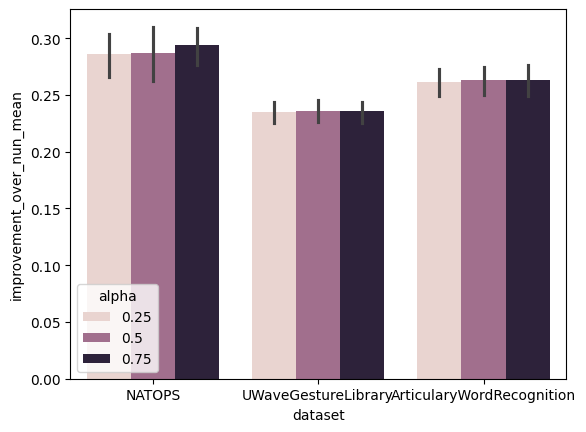

In [12]:
sns.barplot(df_aux_hierarchical_false, x="dataset", y="improvement_over_nun_mean", hue="alpha")

<Axes: xlabel='dataset', ylabel='improvement_over_nun_mean'>

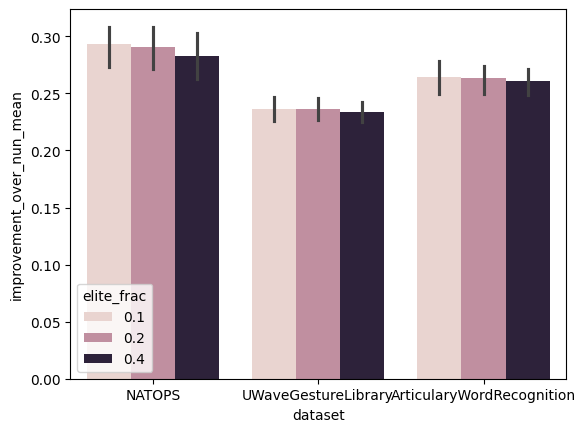

In [13]:
sns.barplot(df_aux_hierarchical_false, x="dataset", y="improvement_over_nun_mean", hue="elite_frac")

<Axes: xlabel='cem_iters', ylabel='improvement_over_nun_mean'>

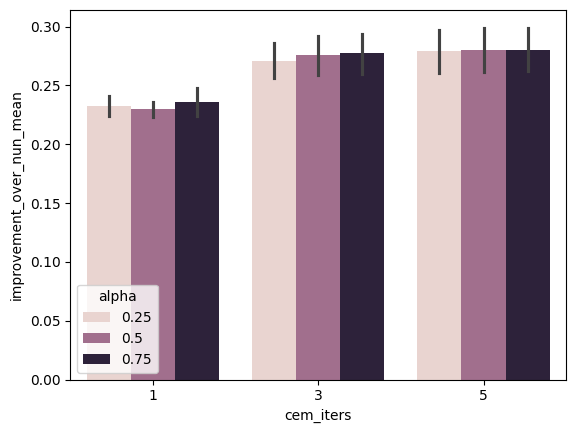

In [14]:
sns.barplot(df_aux_hierarchical_false, x="cem_iters", y="improvement_over_nun_mean", hue="alpha")

<Axes: xlabel='cem_iters', ylabel='improvement_over_nun_mean'>

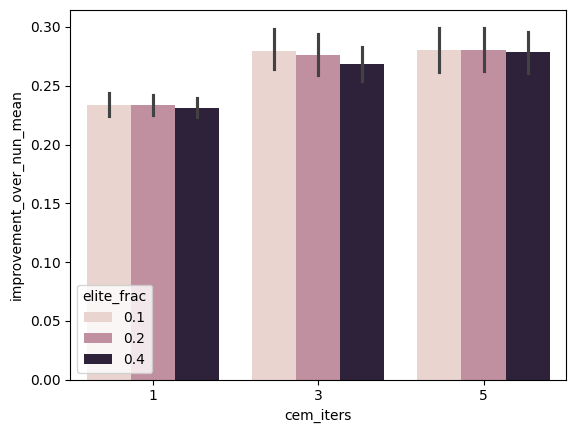

In [15]:
sns.barplot(df_aux_hierarchical_false, x="cem_iters", y="improvement_over_nun_mean", hue="elite_frac")

<Axes: xlabel='elite_frac', ylabel='improvement_over_nun_mean'>

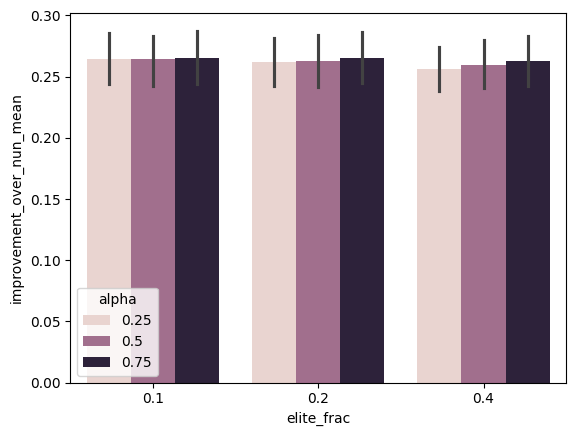

In [16]:
sns.barplot(df_aux_hierarchical_false, x="elite_frac", y="improvement_over_nun_mean", hue="alpha")

# CEM iters and Planning steps

In [17]:
experiment_folder = "hcem_grid_search_iters_planning_steps"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)

In [18]:
df_aux["hue"] = df_aux["planning_credit"].astype(str)

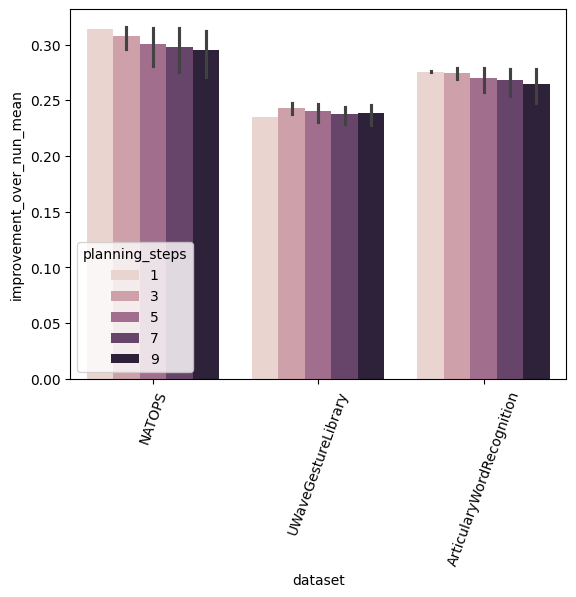

In [19]:
sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="planning_steps")
plt.xticks(rotation=70);

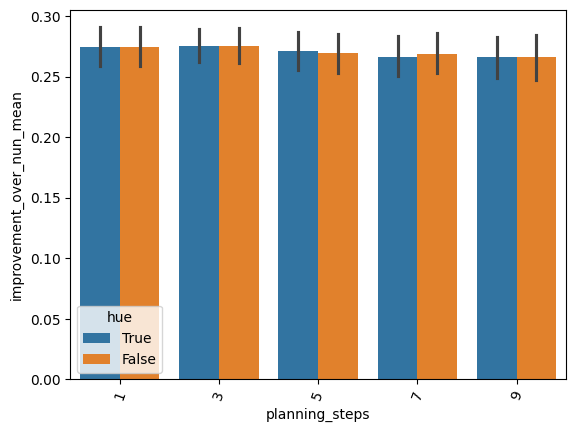

In [20]:
sns.barplot(df_aux, x="planning_steps", y="improvement_over_nun_mean", hue="hue")
plt.xticks(rotation=70);

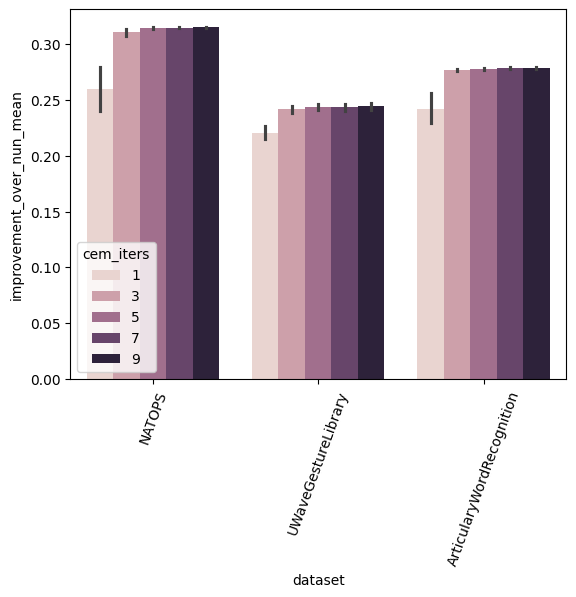

In [21]:
sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="cem_iters")
plt.xticks(rotation=70);

In [22]:
df_aux_false = df_aux[df_aux["hue"] == "False"]

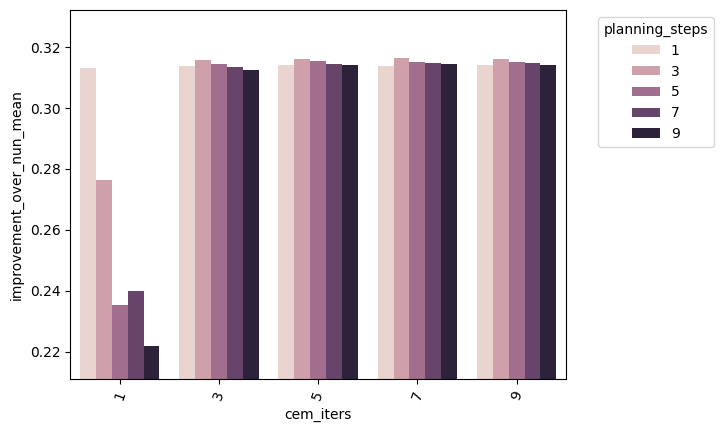

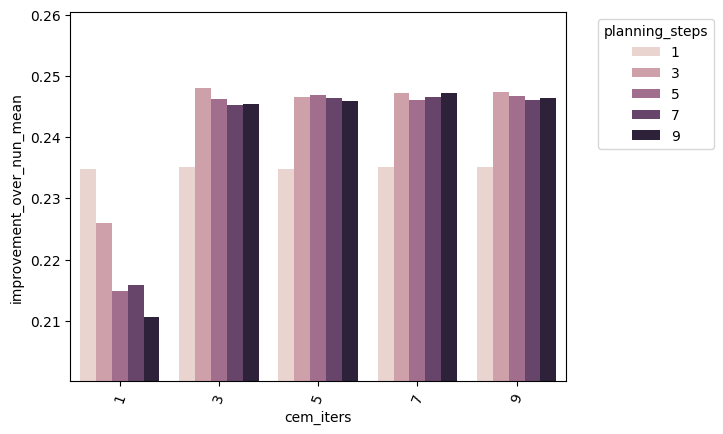

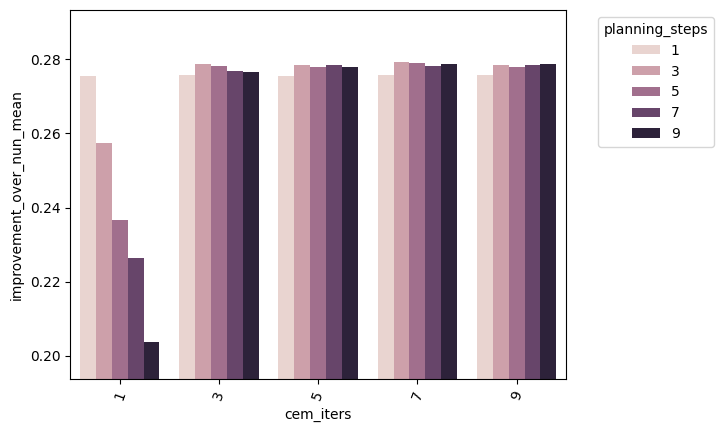

In [23]:
for dataset in DATASETS:
    hue = "planning_steps"
    subset = df_aux_false[df_aux_false["dataset"] == dataset]
    ax = sns.barplot(subset, x="cem_iters", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()



# Sims ratio

In [24]:
experiment_folder = "hcem_grid_search_sims_ratio"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)

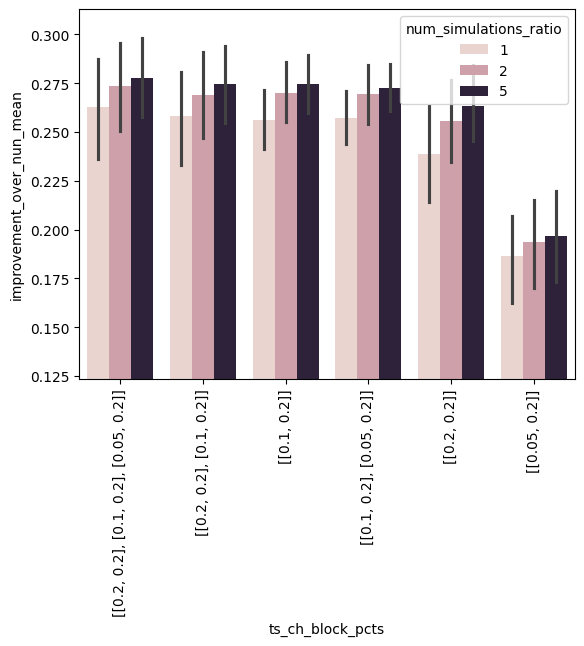

In [25]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue="num_simulations_ratio")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

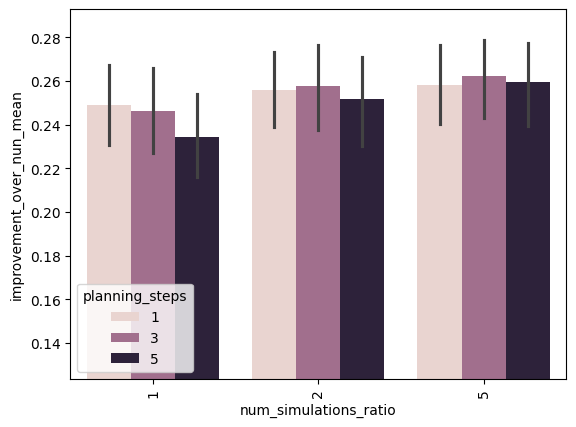

In [26]:
ax = sns.barplot(df_aux, x="num_simulations_ratio", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

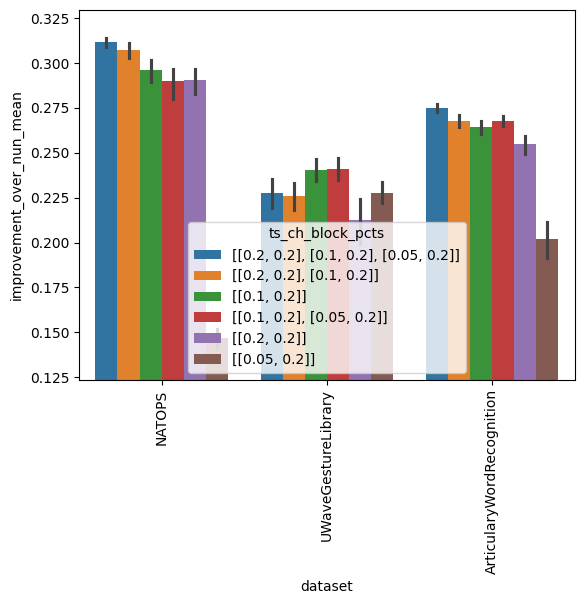

In [27]:
ax = sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="ts_ch_block_pcts")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

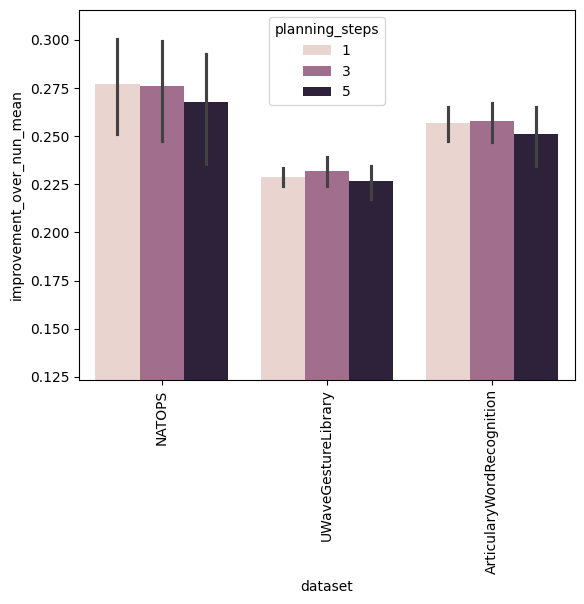

In [28]:
ax = sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

In [29]:
df_aux_sims = df_aux[df_aux["num_simulations_ratio"] == 5]

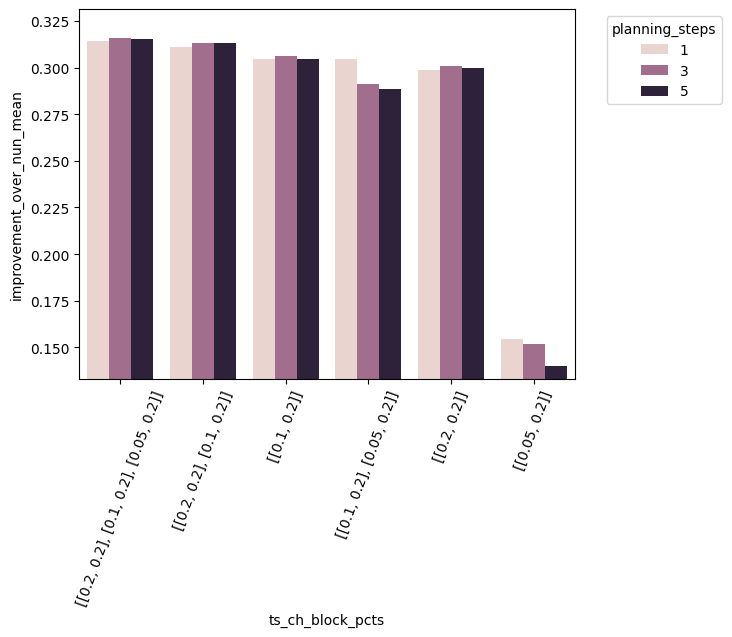

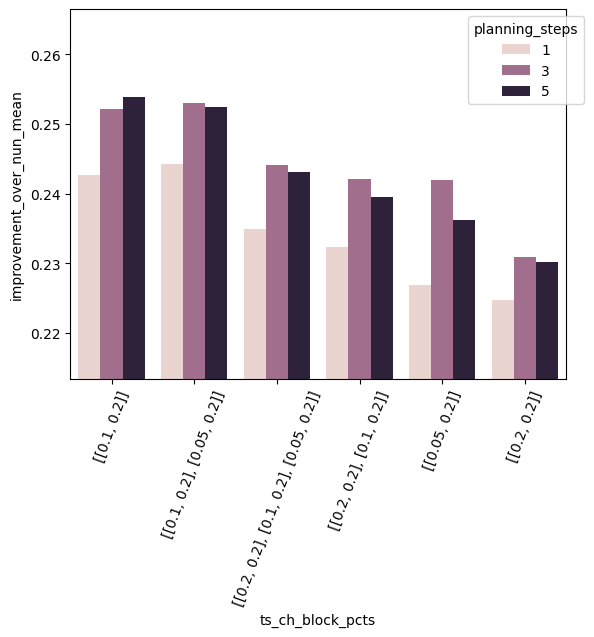

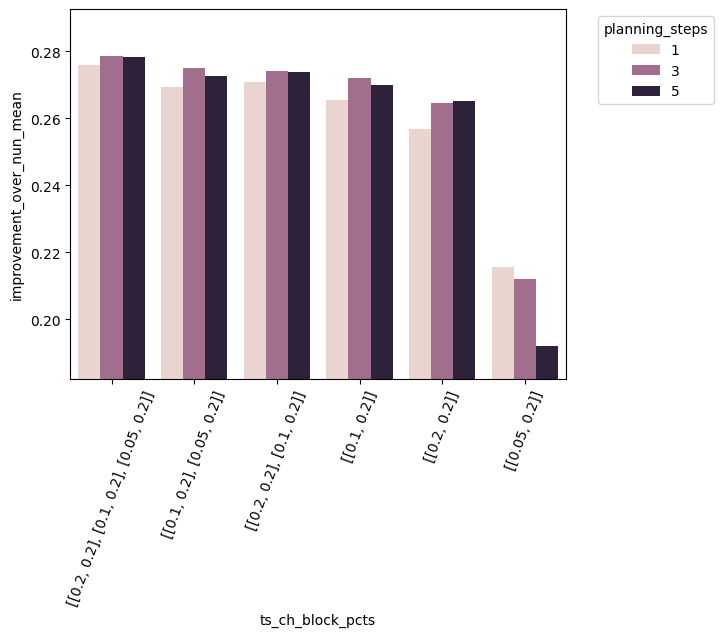

In [30]:
for dataset in DATASETS:
    hue = "planning_steps"
    subset = df_aux_sims[df_aux_sims["dataset"] == dataset]
    ax = sns.barplot(subset, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()


In [31]:
df_aux_sims = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.1, 0.2], [0.05, 0.2]]"]

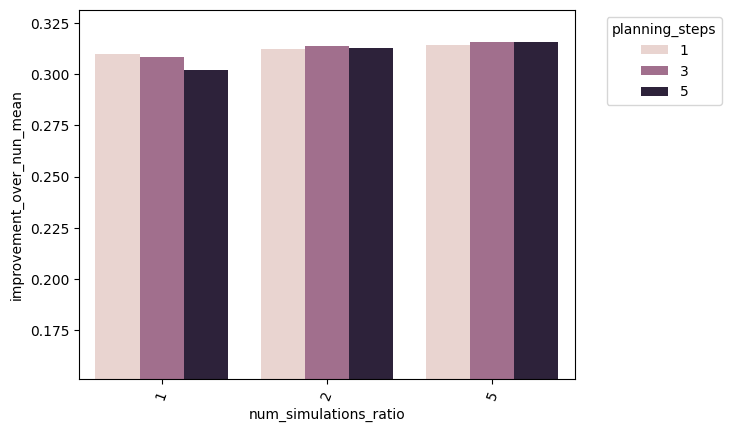

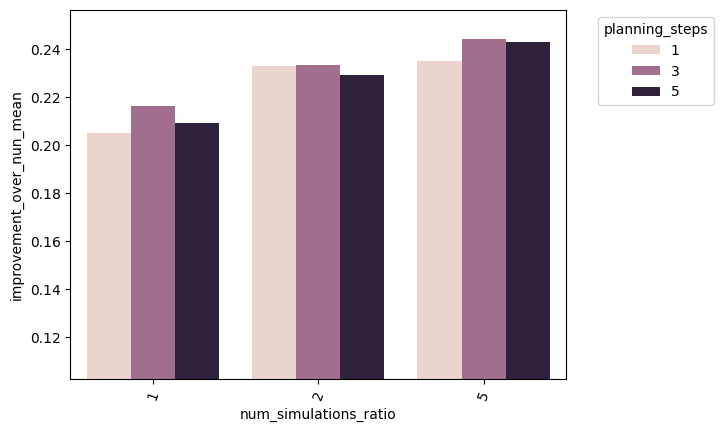

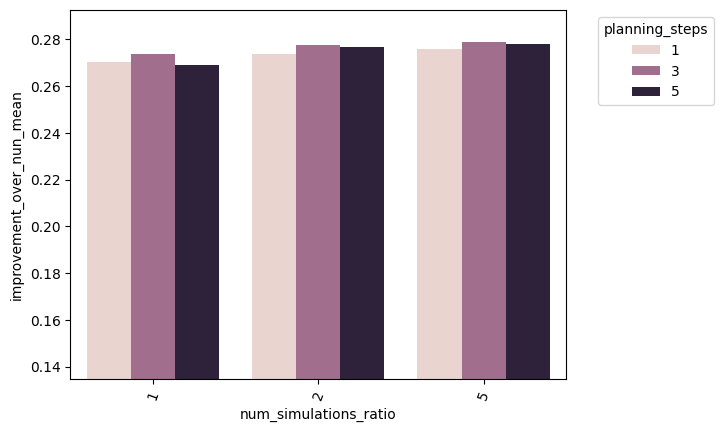

In [32]:
for dataset in DATASETS:
    hue = "planning_steps"
    subset = df_aux_sims[df_aux_sims["dataset"] == dataset]
    ax = sns.barplot(subset, x="num_simulations_ratio", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.5, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

# N simulations ratio vs time

In [33]:
experiment_folder = "hcem_grid_search_sims_ratio_time"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)

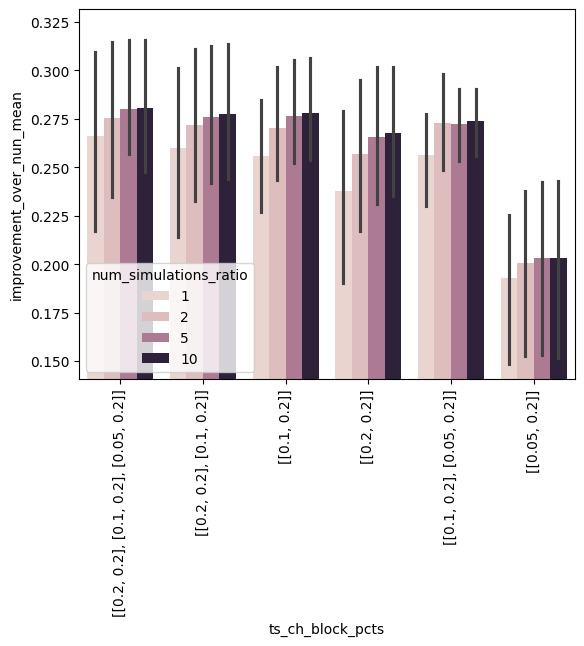

In [34]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue="num_simulations_ratio")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

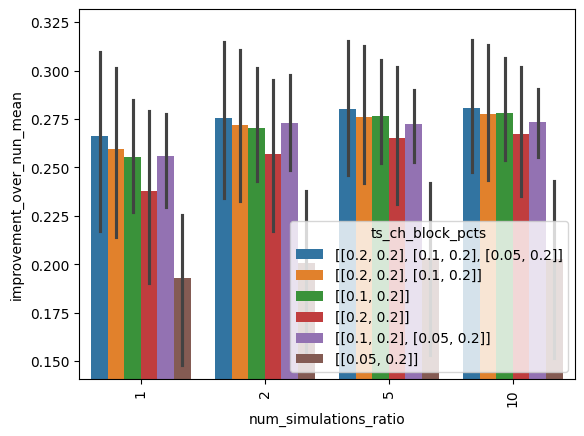

In [35]:
ax = sns.barplot(df_aux, x="num_simulations_ratio", y="improvement_over_nun_mean", hue="ts_ch_block_pcts")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

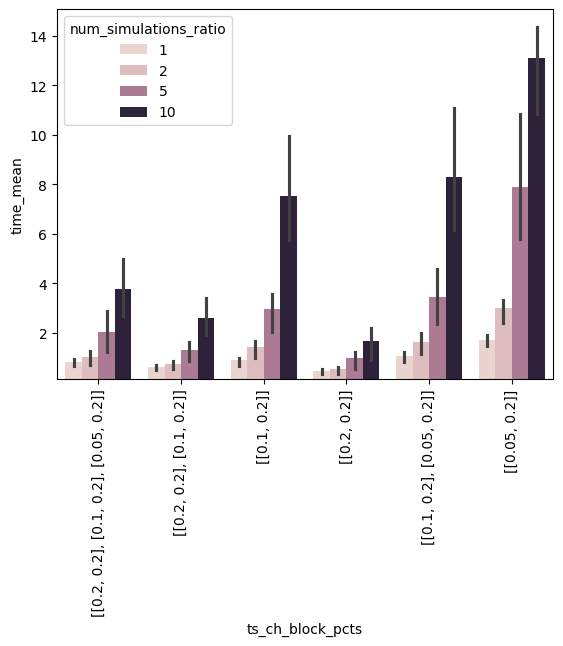

In [36]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="time_mean", hue="num_simulations_ratio")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

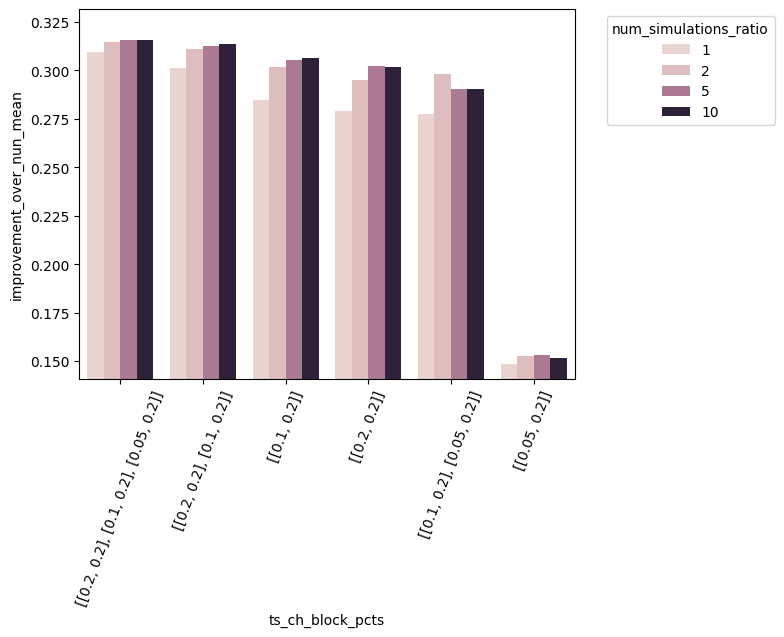

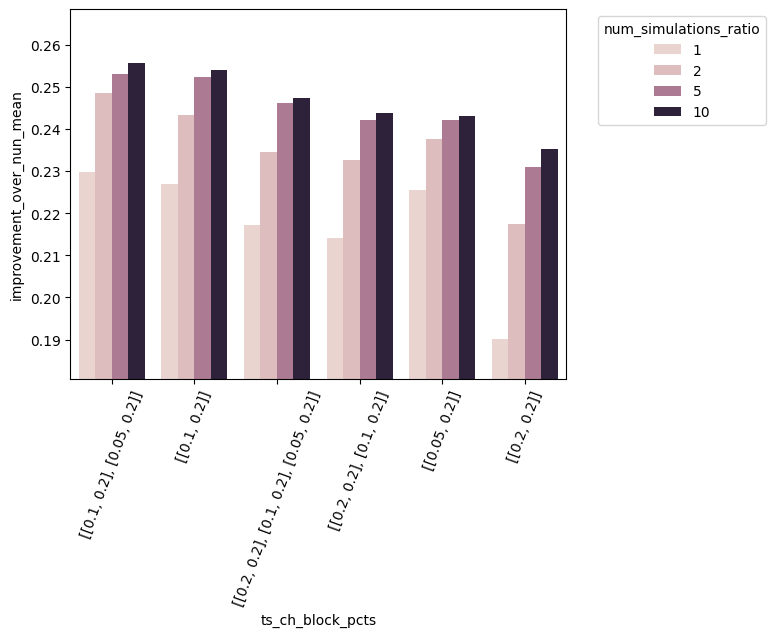

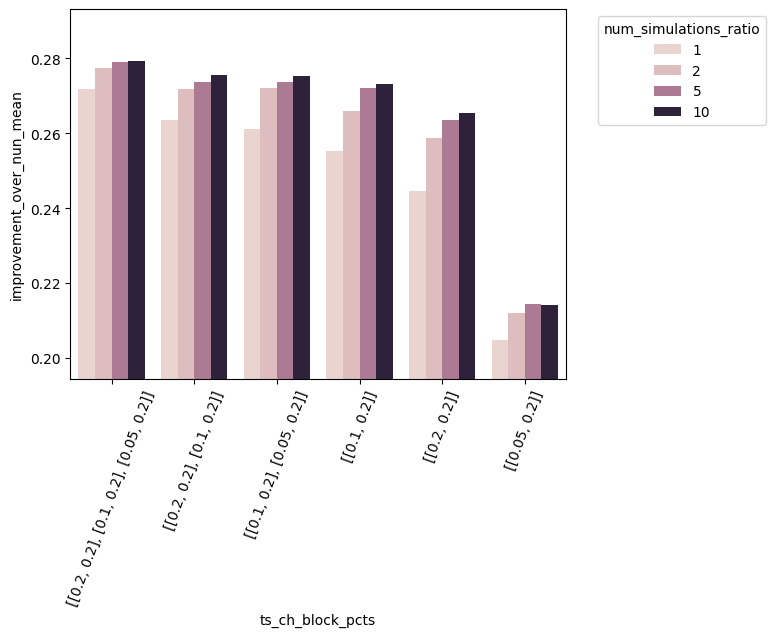

In [37]:
for dataset in DATASETS:
    hue = "num_simulations_ratio"
    subset = df_aux[df_aux["dataset"] == dataset]
    ax = sns.barplot(subset, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

In [38]:
df_aux_sims = df_aux[df_aux["num_simulations_ratio"] == 5]

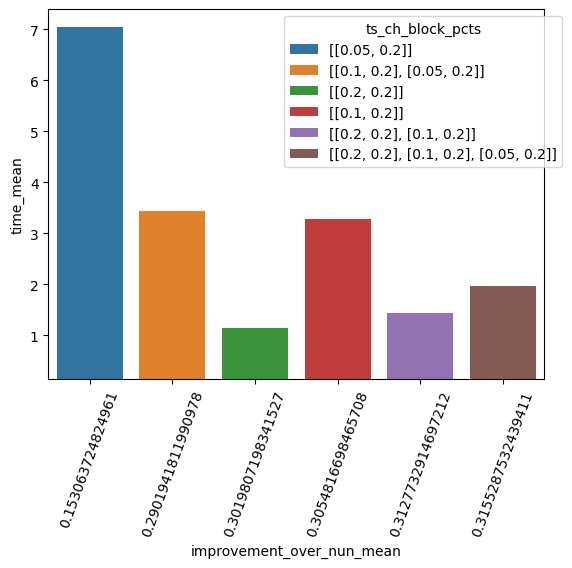

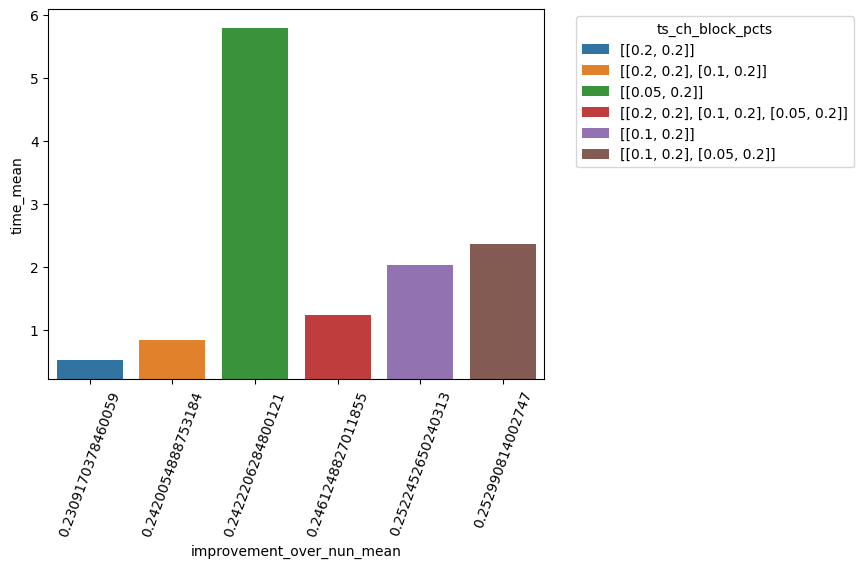

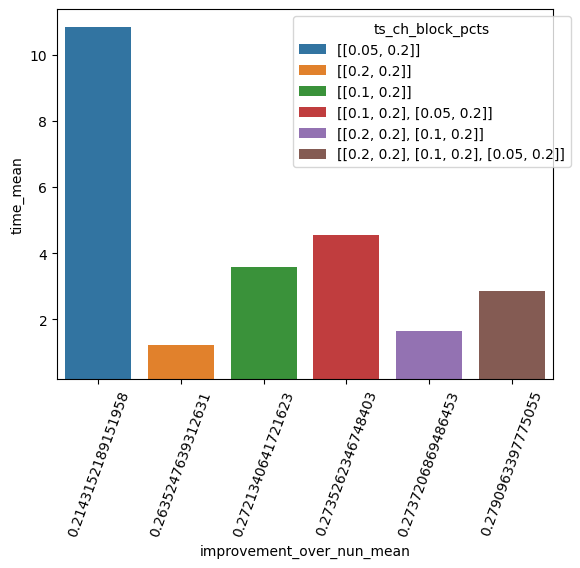

In [39]:
for dataset in DATASETS:
    hue = "ts_ch_block_pcts"
    subset = df_aux_sims[df_aux_sims["dataset"] == dataset]
    ax = sns.barplot(subset, x="improvement_over_nun_mean", y="time_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

# Warm starts

In [40]:
experiment_folder = "hcem_grid_search_warm_start"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)

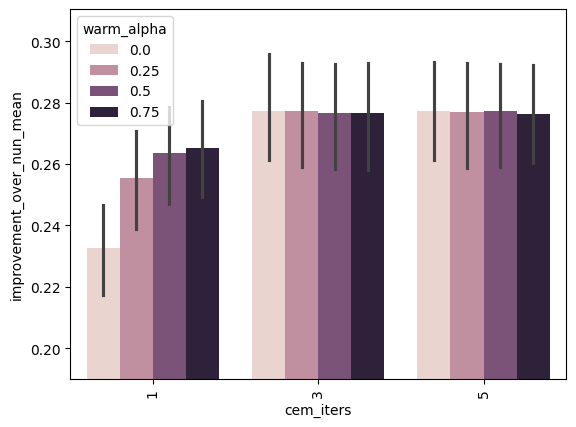

In [41]:
ax = sns.barplot(df_aux, x="cem_iters", y="improvement_over_nun_mean", hue="warm_alpha")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

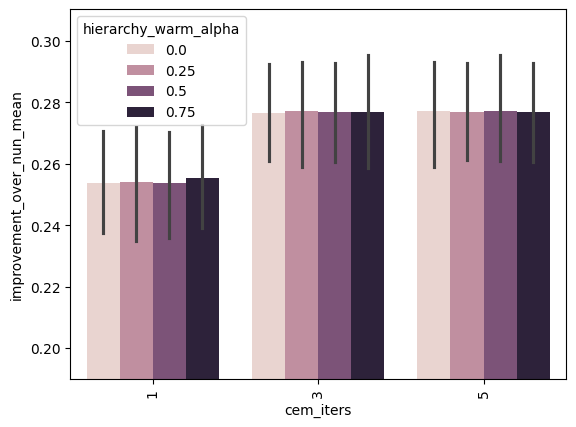

In [42]:
ax = sns.barplot(df_aux, x="cem_iters", y="improvement_over_nun_mean", hue="hierarchy_warm_alpha")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

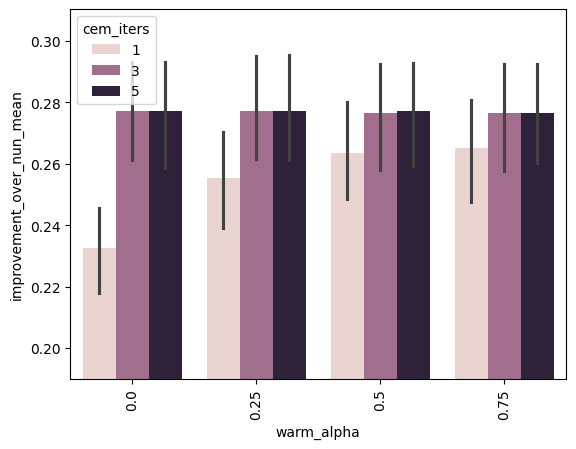

In [43]:
ax = sns.barplot(df_aux, x="warm_alpha", y="improvement_over_nun_mean", hue="cem_iters")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

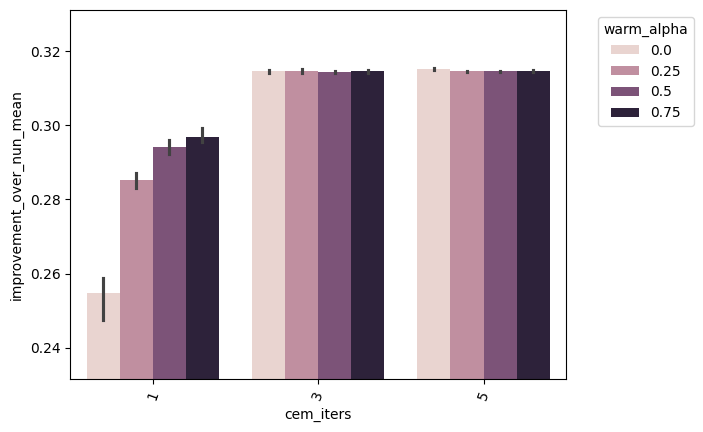

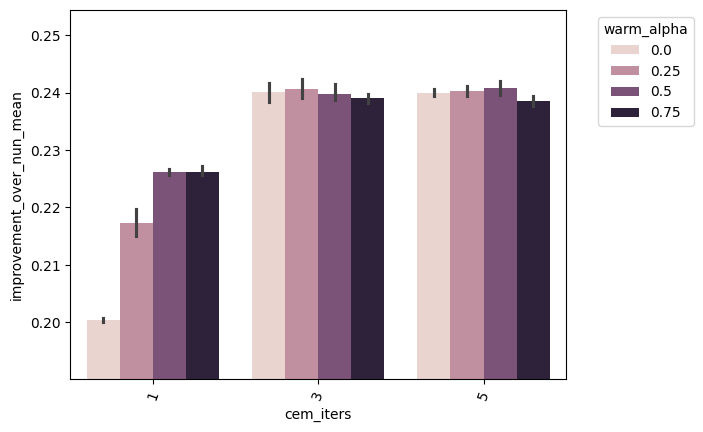

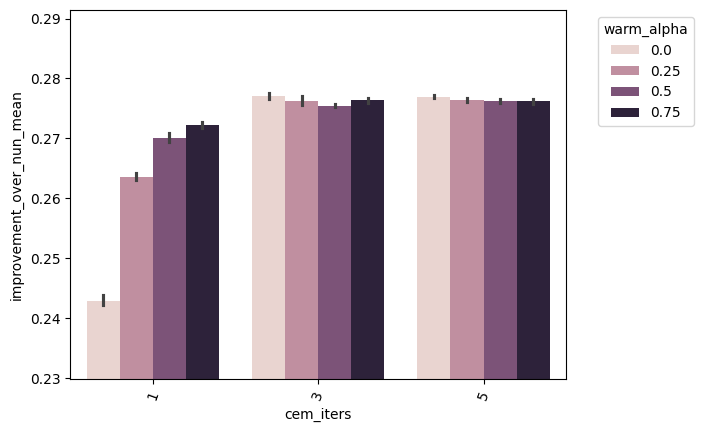

In [44]:
for dataset in DATASETS:
    hue = "warm_alpha"
    subset = df_aux[df_aux["dataset"] == dataset]
    ax = sns.barplot(subset, x="cem_iters", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);

    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

In [45]:
df_aux_iters = df_aux[df_aux["cem_iters"] == 3]

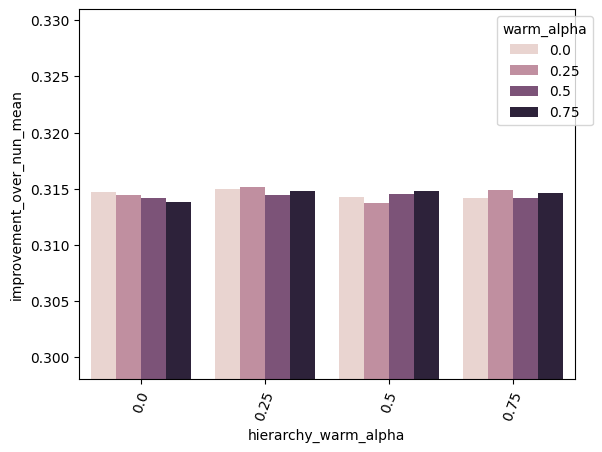

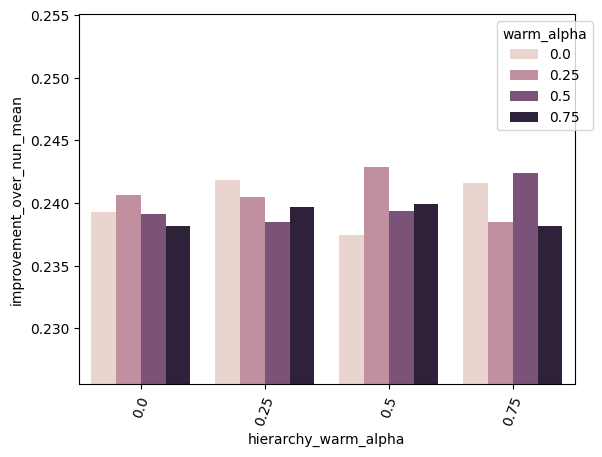

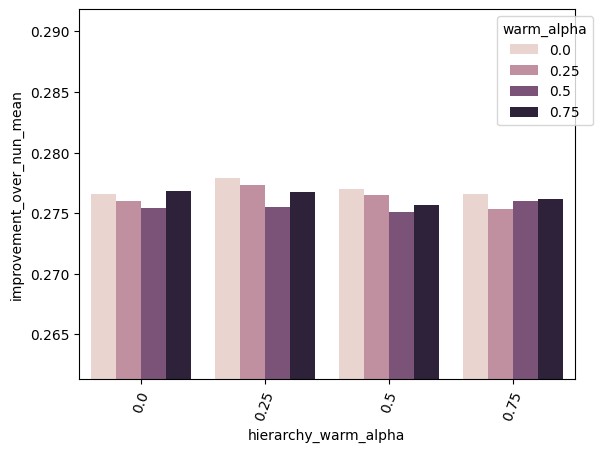

In [46]:
for dataset in DATASETS:
    hue = "warm_alpha"
    subset = df_aux_iters[df_aux_iters["dataset"] == dataset]
    ax = sns.barplot(subset, x="hierarchy_warm_alpha", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

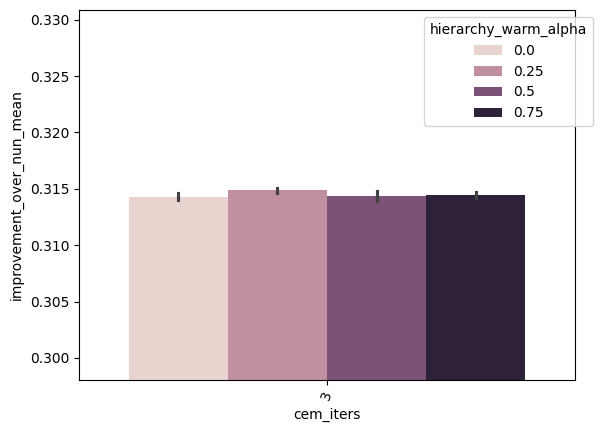

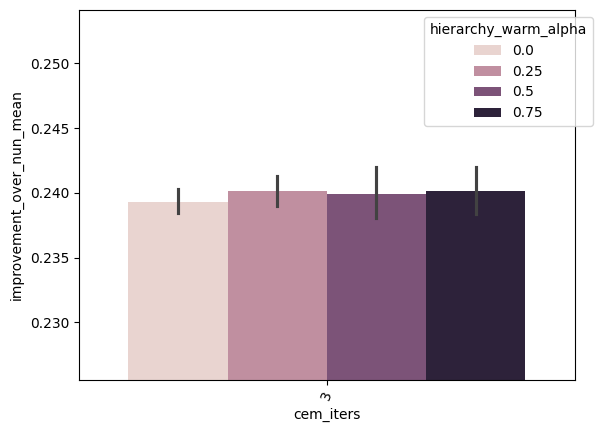

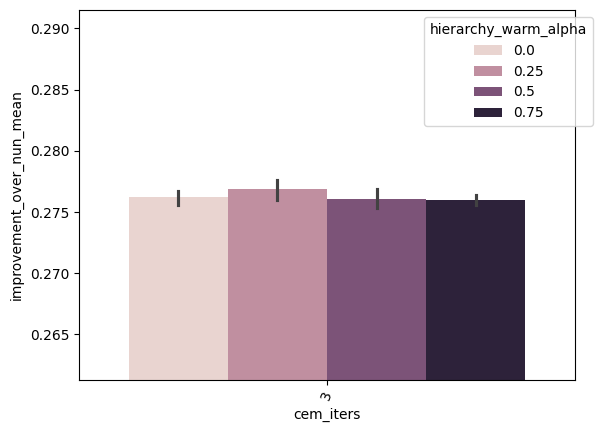

In [47]:
for dataset in DATASETS:
    hue = "hierarchy_warm_alpha"
    subset = df_aux_iters[df_aux_iters["dataset"] == dataset]
    ax = sns.barplot(subset, x="cem_iters", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

# Hierarchies

In [48]:
experiment_folder = "hcem_grid_search_hierarchies"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)

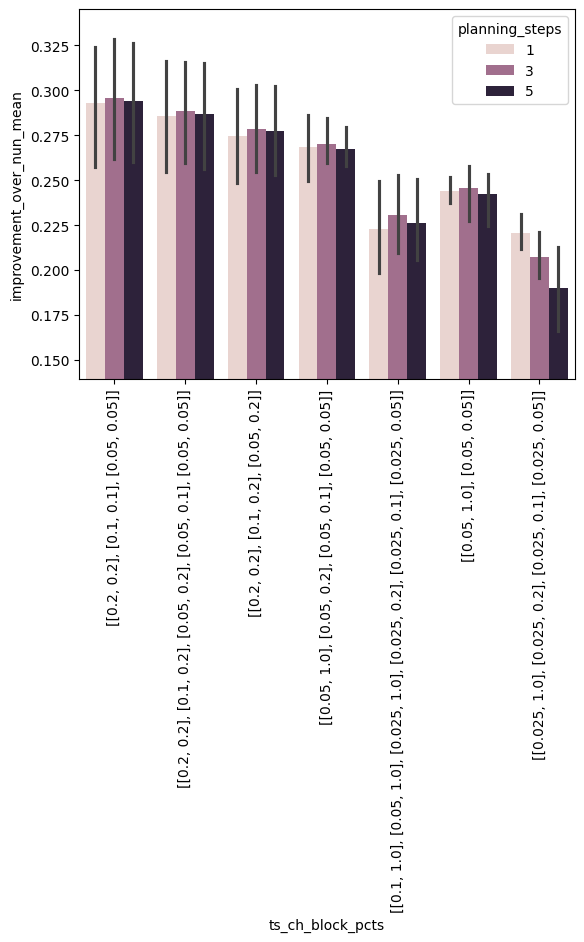

In [49]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

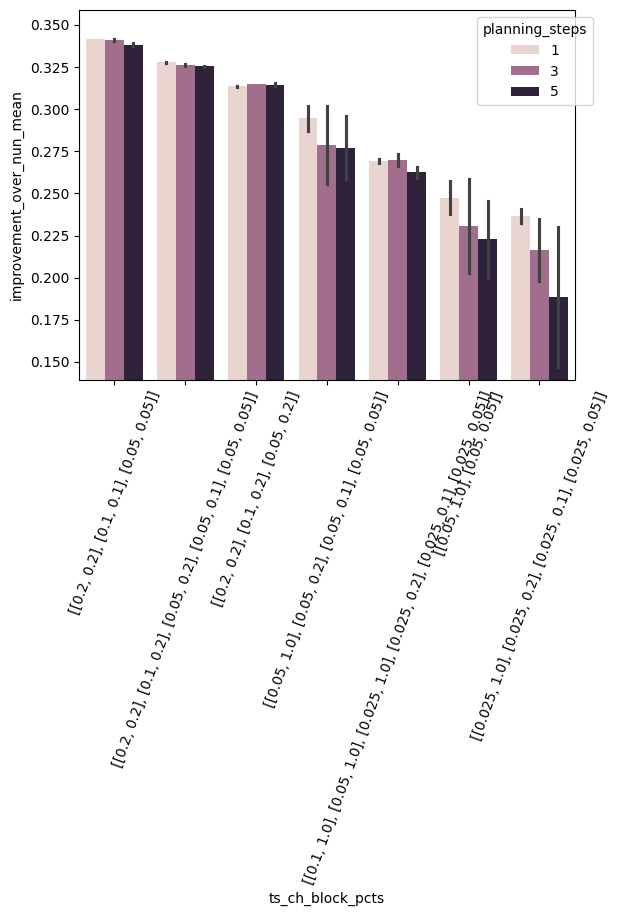

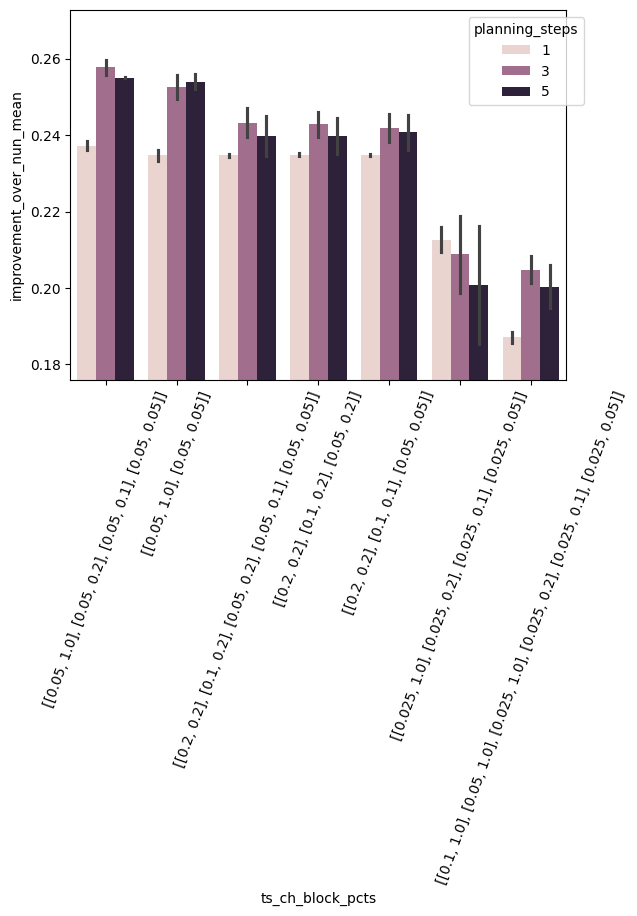

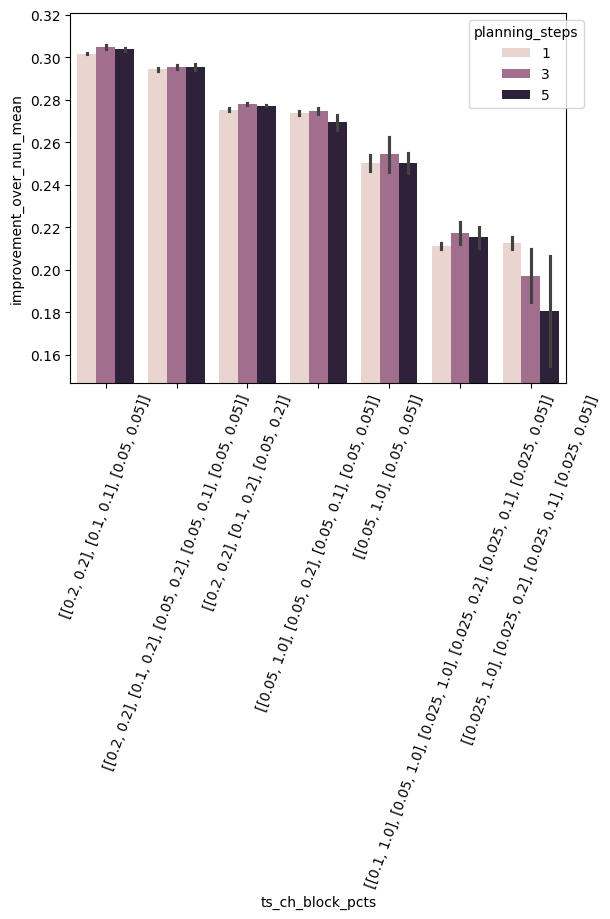

In [50]:
for dataset in DATASETS:
    hue = "planning_steps"
    subset = df_aux[df_aux["dataset"] == dataset]
    ax = sns.barplot(subset, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

# Hierarchies deep analysis


In [62]:
DATASETS = [
    "BasicMotions", 
    "NATOPS", "UWaveGestureLibrary",
    'ArticularyWordRecognition', 
    # 'Cricket', 
    'Epilepsy', 
    'PenDigits', 
    # 'PEMS-SF', 
    'RacketSports',
    # 'SelfRegulationSCP1'
]

In [63]:
experiment_folder = "hcem_sensitivity_hierarchies_flat_plau"
df_aux_flat = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux_flat = df_aux_flat[df_aux_flat["weight_losses"] == "[0.1, 0.3, 0.4, 0.2]"]

In [64]:
def get_ts_pct_block(x):
    ts, ch = x.replace("[", "").replace(" ", "").replace("]", "").split(",")
    return ts
def get_ch_pct_block(x):
    ts, ch = x.replace("[", "").replace(" ", "").replace("]", "").split(",")
    return ch

In [65]:
df_aux_flat["ts_block_pct"] = df_aux_flat["ts_ch_block_pcts"].apply(get_ts_pct_block).astype(float)
df_aux_flat["ch_block_pct"] = df_aux_flat["ts_ch_block_pcts"].apply(get_ch_pct_block).astype(float)

In [66]:
heatmap_flat_df = df_aux_flat[["ts_block_pct", "ch_block_pct", "improvement_over_nun_mean"]].groupby(["ts_block_pct", "ch_block_pct"]).mean().reset_index()
heatmap_flat_df = heatmap_flat_df.pivot(index="ts_block_pct", columns="ch_block_pct", values="improvement_over_nun_mean")
heatmap_flat_df

ch_block_pct,0.05,0.10,0.20
ts_block_pct,,,
0.05,0.135525,0.138451,0.172873
0.10,0.194795,0.206807,0.228261
0.20,0.219628,0.235315,0.228525


<Axes: xlabel='ch_block_pct', ylabel='ts_block_pct'>

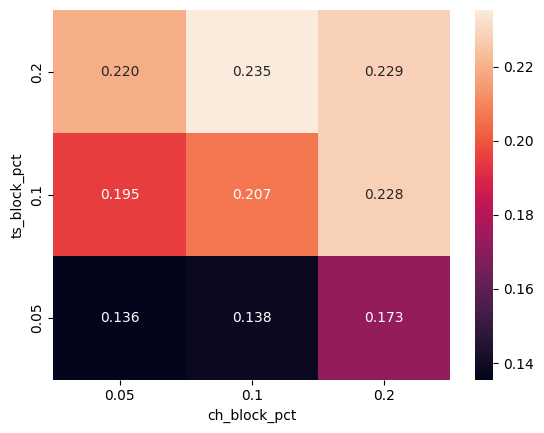

In [67]:
sns.heatmap(heatmap_flat_df.sort_index(ascending=False), annot=True, fmt=".3f")

In [69]:
heatmap_flat_df = df_aux_flat[["ts_block_pct", "ch_block_pct", "improvement_over_nun_mean"]].groupby(["ts_block_pct", "ch_block_pct"]).mean().reset_index()
heatmap_flat_df = heatmap_flat_df.pivot(index="ts_block_pct", columns="ch_block_pct", values="improvement_over_nun_mean")
heatmap_flat_df

ch_block_pct,0.05,0.10,0.20
ts_block_pct,,,
0.05,0.135525,0.138451,0.172873
0.10,0.194795,0.206807,0.228261
0.20,0.219628,0.235315,0.228525


In [56]:
experiment_folder = "hcem_sensitivity_hierarchies_two_plau"
df_aux_two = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux_two = df_aux_two[df_aux_two["weight_losses"] == "[0.1, 0.3, 0.4, 0.2]"]
df_aux_two = df_aux_two[["experiment_name", "dataset", "ts_ch_block_pcts", "improvement_over_nun_mean", "steps_mean"]]
df_aux_two.to_csv("hierarchies_two.csv")

In [57]:
import ast

# Parse hierarchy
pcts=df_aux_two['ts_ch_block_pcts'].apply(ast.literal_eval)
df_aux_two['lvl1_t']=pcts.apply(lambda x: x[0][0])
df_aux_two['lvl1_c']=pcts.apply(lambda x: x[0][1])
df_aux_two['lvl2_t']=pcts.apply(lambda x: x[1][0])
df_aux_two['lvl2_c']=pcts.apply(lambda x: x[1][1])

# Reduction type
df_aux_two['reduction_type']=np.select(
    [
        (df_aux_two['lvl2_t']<df_aux_two['lvl1_t']) & (df_aux_two['lvl2_c']<df_aux_two['lvl1_c']),
        (df_aux_two['lvl2_t']<df_aux_two['lvl1_t']) & (df_aux_two['lvl2_c']==df_aux_two['lvl1_c']),
        (df_aux_two['lvl2_t']==df_aux_two['lvl1_t']) & (df_aux_two['lvl2_c']<df_aux_two['lvl1_c']),
        (df_aux_two['lvl2_t']==df_aux_two['lvl1_t']) & (df_aux_two['lvl2_c']==df_aux_two['lvl1_c']),
    ],
    ['both_reduce','ts_only','ch_only','none'],
    default='other'
)

# "Balanced" (same reduction ratio) among both_reduce
df_aux_two['balanced']=((df_aux_two['reduction_type']=='both_reduce') &
                np.isclose(df_aux_two['lvl2_t']/df_aux_two['lvl1_t'], df_aux_two['lvl2_c']/df_aux_two['lvl1_c']))

# Step encoding: 0.2 > 0.1 > 0.05
order={0.2:2,0.1:1,0.05:0}
df_aux_two['step_t']=df_aux_two.apply(lambda r: order[r.lvl1_t]-order[r.lvl2_t], axis=1)
df_aux_two['step_c']=df_aux_two.apply(lambda r: order[r.lvl1_c]-order[r.lvl2_c], axis=1)

# metric='improvement_over_nun_mean'
metric='steps_mean'
metric='improvement_over_nun_mean'

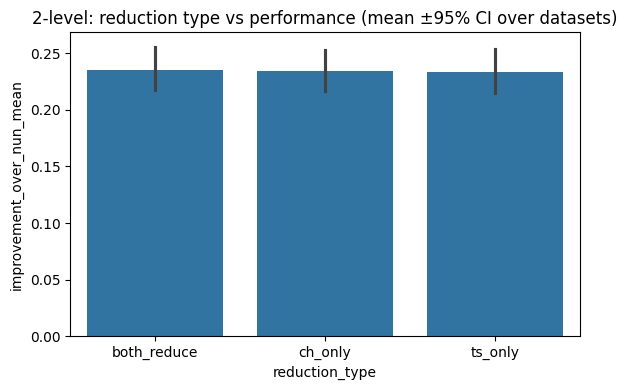

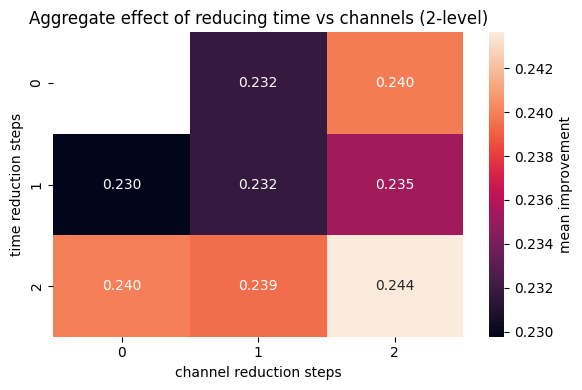

In [58]:
# --- Reduction-type plot (dataset-averaged) ---
ds_type = df_aux_two.groupby(["dataset", "reduction_type"])[metric].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=ds_type, x="reduction_type", y=metric, errorbar=("ci", 95))
plt.title("2-level: reduction type vs performance (mean ±95% CI over datasets)")
plt.tight_layout()
plt.show()

# --- Heatmap for step sizes ---
step = df_aux_two.groupby(["step_t", "step_c"])[metric].mean().reset_index()
pivot = step.pivot(index="step_t", columns="step_c", values=metric)
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".3f", cbar_kws={"label": "mean improvement"})
plt.title("Aggregate effect of reducing time vs channels (2-level)")
plt.xlabel("channel reduction steps")
plt.ylabel("time reduction steps")
plt.tight_layout()
plt.show()

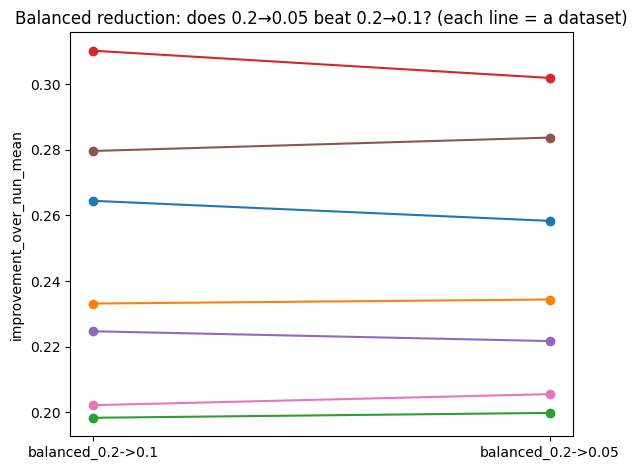

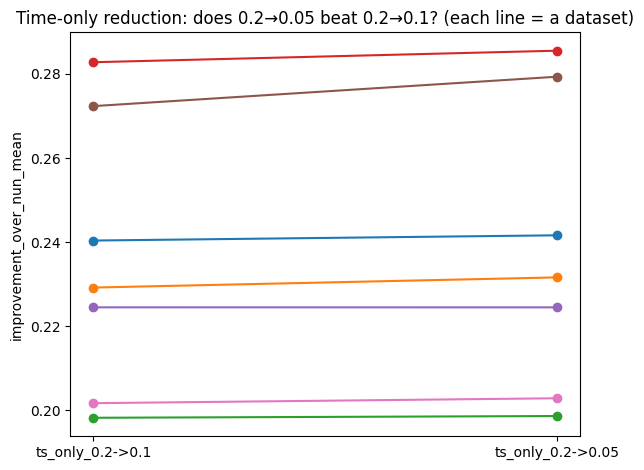

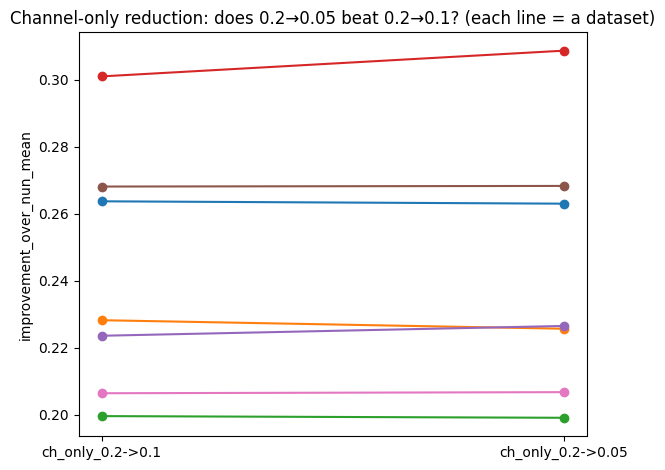

In [59]:
# 3) Focused comparisons: from (0.2,0.2) start, 0.2→0.1 vs 0.2→0.05 (paired per dataset)
def get_vals(l2t,l2c):
    sub=df_aux_two[(df_aux_two.lvl1_t==0.2)&(df_aux_two.lvl1_c==0.2)&(df_aux_two.lvl2_t==l2t)&(df_aux_two.lvl2_c==l2c)][['dataset',metric]]
    return sub.set_index('dataset')[metric]

# Three paired comparisons: balanced, ts-only, ch-only
paired = pd.DataFrame({
    'dataset': sorted(df_aux_two['dataset'].unique())
}).set_index('dataset')

paired['balanced_0.2->0.1'] = get_vals(0.1,0.1)
paired['balanced_0.2->0.05'] = get_vals(0.05,0.05)

paired['ts_only_0.2->0.1'] = get_vals(0.1,0.2)
paired['ts_only_0.2->0.05'] = get_vals(0.05,0.2)

paired['ch_only_0.2->0.1'] = get_vals(0.2,0.1)
paired['ch_only_0.2->0.05'] = get_vals(0.2,0.05)

# display_dataframe_to_user("Per-dataset values for (0.2,0.2) → {0.1 or 0.05} comparisons", paired.reset_index())

def slope_plot(col_a, col_b, title):
    tmp = paired[[col_a, col_b]].dropna()
    plt.figure()
    for ds, row in tmp.iterrows():
        plt.plot([0,1], [row[col_a], row[col_b]], marker='o')
    plt.xticks([0,1], [col_a, col_b], rotation=0)
    plt.ylabel(metric)
    plt.title(title + " (each line = a dataset)")
    plt.tight_layout()
    plt.show()

slope_plot('balanced_0.2->0.1','balanced_0.2->0.05', "Balanced reduction: does 0.2→0.05 beat 0.2→0.1?")
slope_plot('ts_only_0.2->0.1','ts_only_0.2->0.05', "Time-only reduction: does 0.2→0.05 beat 0.2→0.1?")
slope_plot('ch_only_0.2->0.1','ch_only_0.2->0.05', "Channel-only reduction: does 0.2→0.05 beat 0.2→0.1?")

In [60]:
df_aux_two[["ts_ch_block_pcts", "improvement_over_nun_mean", "steps_mean"]].groupby("ts_ch_block_pcts").mean().sort_values(by="improvement_over_nun_mean")

,improvement_over_nun_mean,steps_mean
ts_ch_block_pcts,,
"[[0.1, 0.1], [0.05, 0.05]]",0.208537,37.150000
"[[0.1, 0.1], [0.1, 0.05]]",0.209101,36.670714
"[[0.1, 0.1], [0.05, 0.1]]",0.209577,36.972143
"[[0.1, 0.2], [0.05, 0.2]]",0.233234,35.175000
"[[0.1, 0.2], [0.05, 0.05]]",0.235306,36.204286
"[[0.2, 0.2], [0.1, 0.2]]",0.235611,20.650000
"[[0.1, 0.2], [0.05, 0.1]]",0.235773,36.129286
"[[0.1, 0.2], [0.1, 0.05]]",0.237076,35.156429
"[[0.1, 0.2], [0.1, 0.1]]",0.237426,35.355000


In [70]:
experiment_folder = "hcem_sensitivity_hierarchies_three_plau"
df_aux_three = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux_three = df_aux_three[df_aux_three["weight_losses"] == "[0.1, 0.3, 0.4, 0.2]"]
df_aux_three = df_aux_three[["experiment_name", "dataset", "ts_ch_block_pcts", "improvement_over_nun_mean", "steps_mean"]]
df_aux_three.to_csv("hierarchies_three.csv")

In [77]:
df_aux_three = df_aux_three[df_aux_three["ts_ch_block_pcts"].isin([
    "[[0.2, 0.2], [0.1, 0.2], [0.05, 0.2]]",
    "[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05]]",
    "[[0.2, 0.2], [0.05, 0.2], [0.05, 0.05]]",
    "[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]",
    "[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]"])]

In [78]:
df_aux_three[["ts_ch_block_pcts", "improvement_over_nun_mean", "steps_mean"]].groupby("ts_ch_block_pcts").mean().sort_values(by="improvement_over_nun_mean")

,improvement_over_nun_mean,steps_mean
ts_ch_block_pcts,,
"[[0.2, 0.2], [0.1, 0.2], [0.05, 0.2]]",0.239289,23.508571
"[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05]]",0.244137,22.892857
"[[0.2, 0.2], [0.05, 0.2], [0.05, 0.05]]",0.245110,28.460714
"[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]",0.247908,26.943571
"[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]",0.250257,27.377143


# PLanning

In [30]:
experiment_folder = "hcem_sensitivity_planning_plau"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux = df_aux[df_aux["weight_losses"] == "[0.1, 0.3, 0.4, 0.2]"]
df_aux = df_aux[["experiment_name", "dataset", "ts_ch_block_pcts", "planning_steps", "improvement_over_nun_mean"]]


In [31]:
df_aux_2 = df_aux[df_aux["planning_steps"] == 3]
df_aux_2[["ts_ch_block_pcts", "improvement_over_nun_mean"]].groupby("ts_ch_block_pcts").mean().sort_values(by="improvement_over_nun_mean")

,improvement_over_nun_mean
ts_ch_block_pcts,
"[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]",0.248418
"[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]",0.250997
"[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05], [0.1, 0.05], [0.05, 0.05]]",0.252606


In [32]:
df_aux

,experiment_name,dataset,ts_ch_block_pcts,planning_steps,improvement_over_nun_mean
16,_f2bf0b5bd02e629e5211757b83d0889936150119,BasicMotions,"[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05], [0.1, 0....",3,0.237327
4,_6261e6205d7c7857faf6e11e9b2e8019081e2c41,BasicMotions,"[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05], [0.1, 0....",5,0.236328
10,_b7f9122e10a31d5b4ed19a48d1bff3397d238841,BasicMotions,"[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]",3,0.235879
12,_d1e9a9c27bcda4b675b9936a04ef693ce1e80695,BasicMotions,"[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]",3,0.235830
6,_9962d0d28777c7a218256582afd689ee8263570e,BasicMotions,"[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]",5,0.235233
...,...,...,...,...,...
6,_9962d0d28777c7a218256582afd689ee8263570e,RacketSports,"[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]",5,0.287038
14,_e18e6d996670016eb1bc049530c3be817456e1f1,RacketSports,"[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05], [0.1, 0....",1,0.286409
0,_01cef9d64d15f75893c964b04289184391878164,RacketSports,"[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]",5,0.285337
17,_f7d5216637b75d29755cc7b36842c4583c440cca,RacketSports,"[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]",1,0.284685


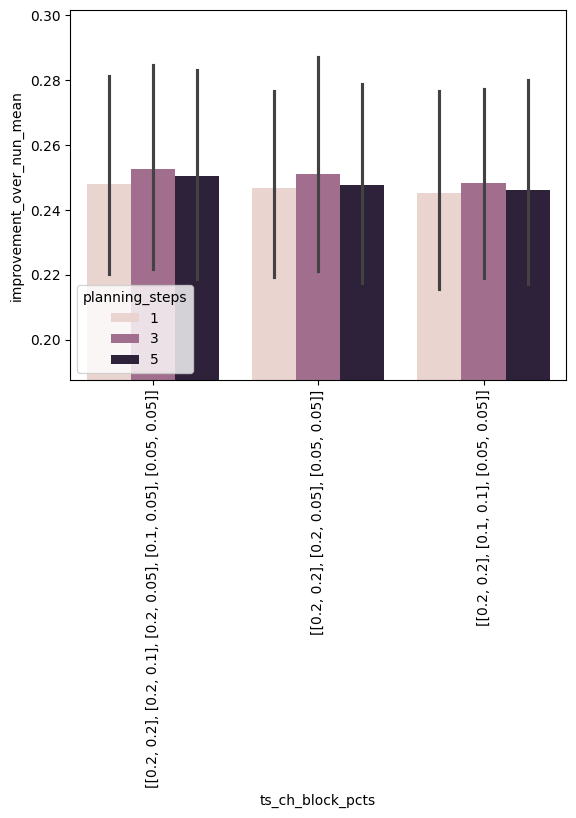

In [33]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

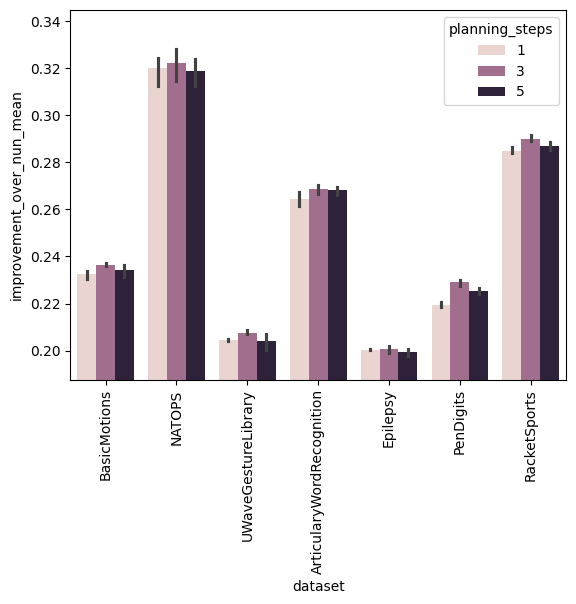

In [34]:
ax = sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

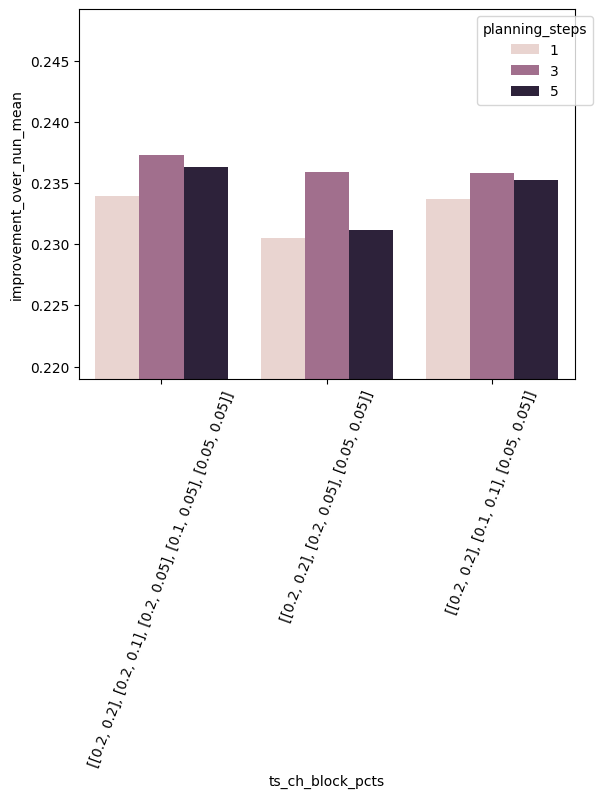

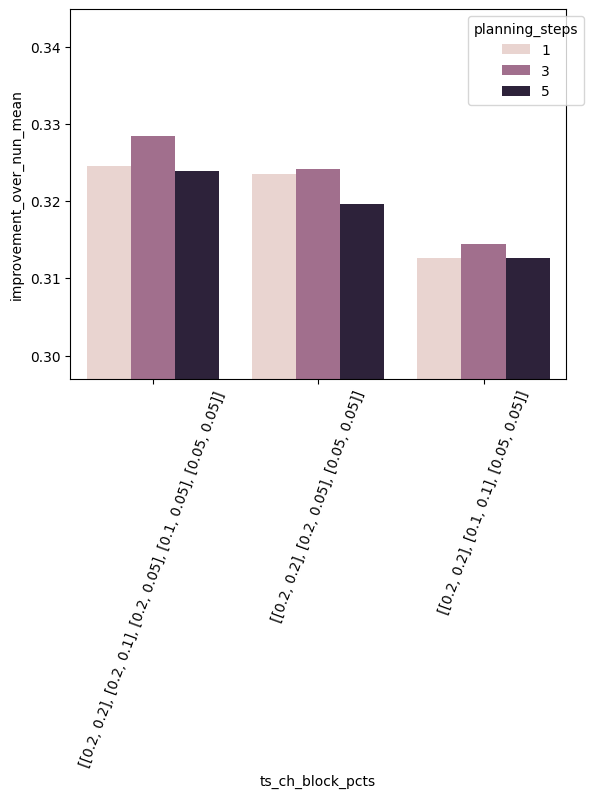

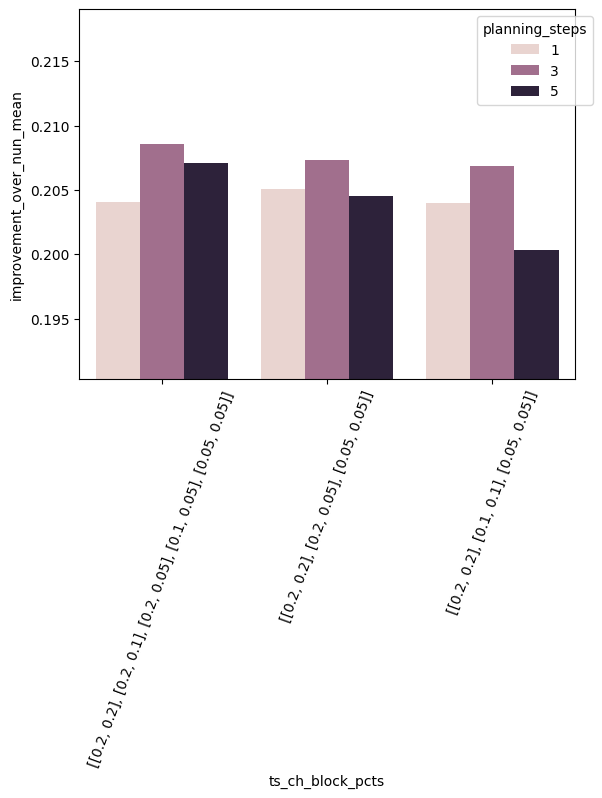

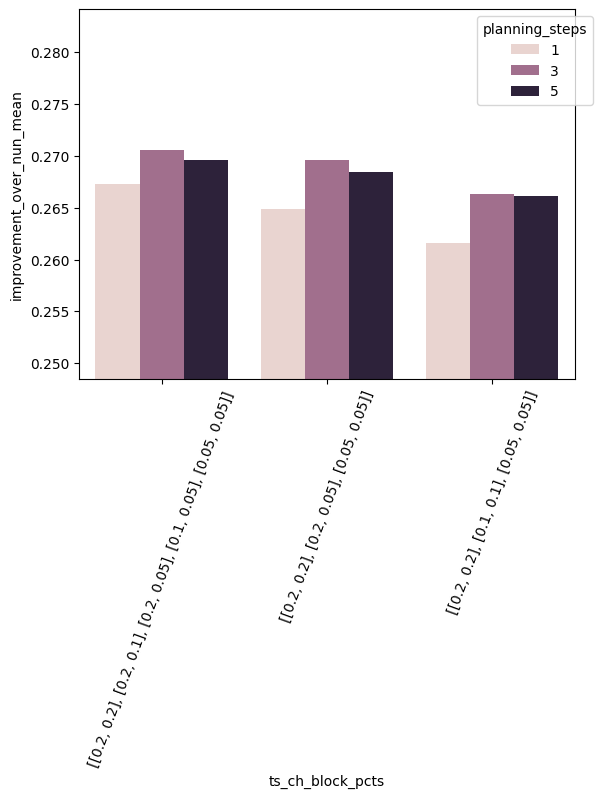

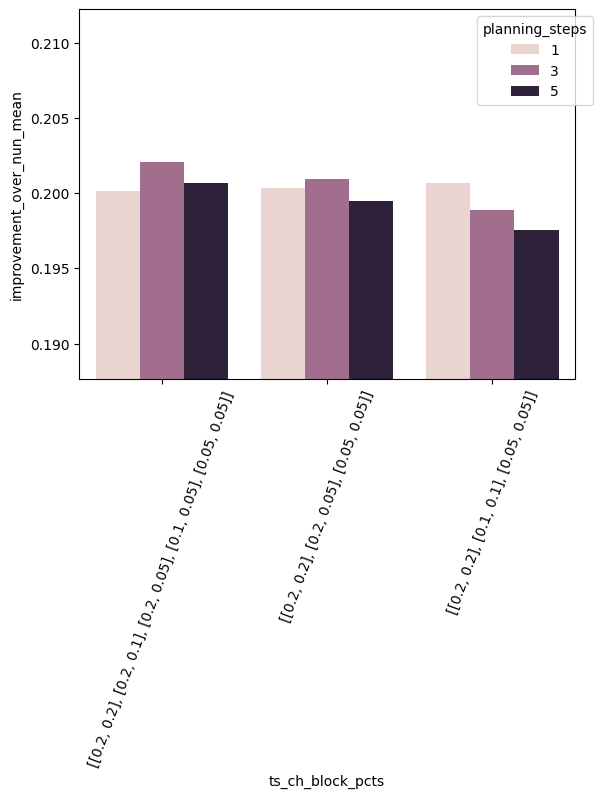

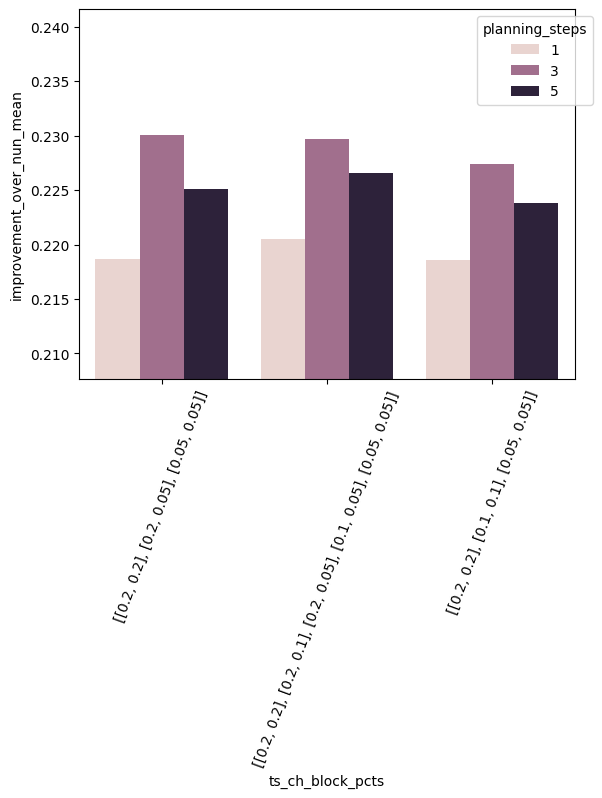

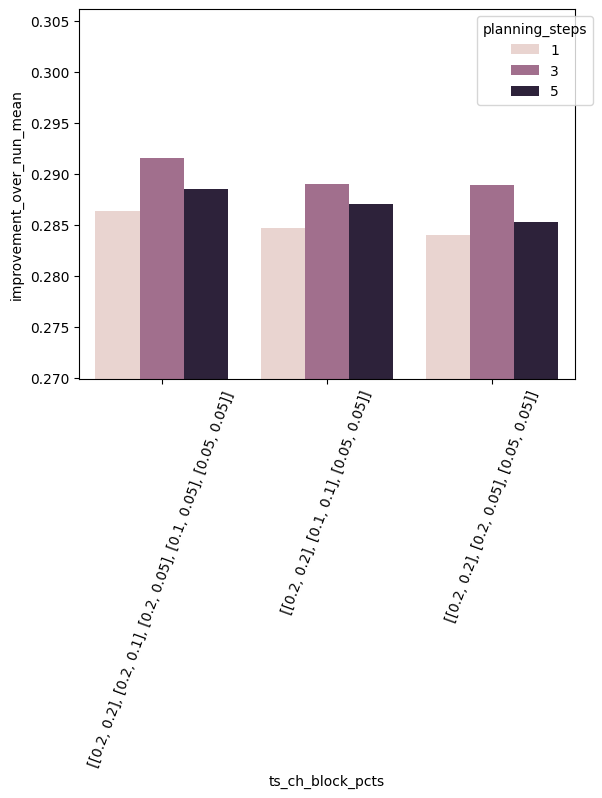

In [35]:
for dataset in DATASETS:
    hue = "planning_steps"
    subset = df_aux[df_aux["dataset"] == dataset]
    ax = sns.barplot(subset, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue=hue)
    plt.xticks(rotation=70);
    current_ymax = ax.get_ylim()[1]
    ax.set_ylim(subset["improvement_over_nun_mean"].min() * 0.95, current_ymax)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1))
    plt.show()

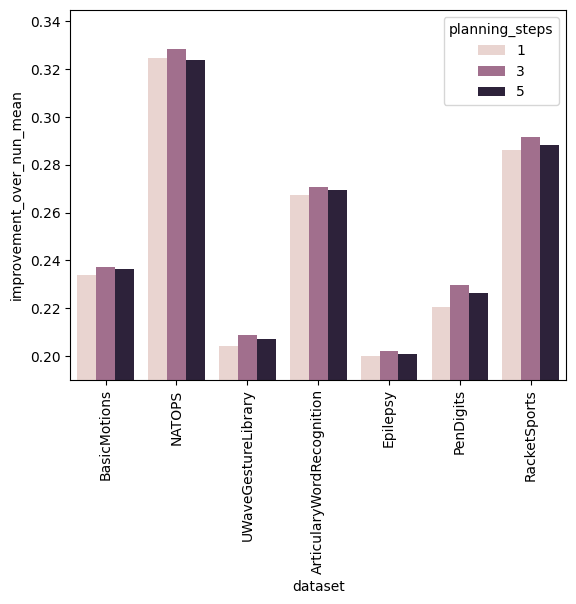

In [36]:
# df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]"] 
# df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]"]
df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05], [0.1, 0.05], [0.05, 0.05]]"] 
ax = sns.barplot(df_aux_h, x="dataset", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux_h["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

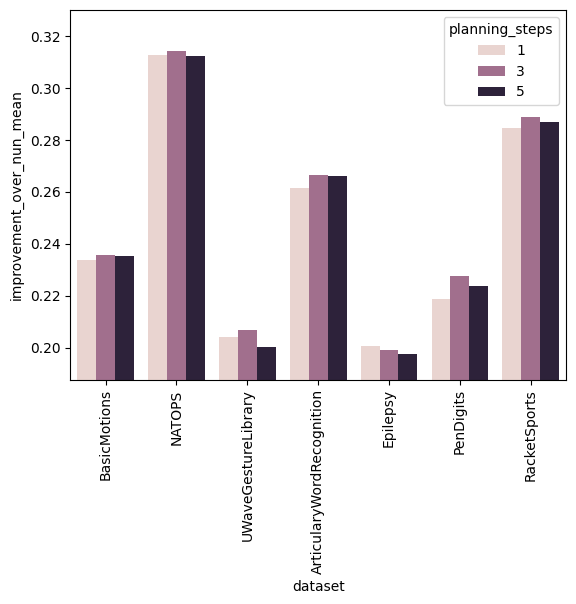

In [37]:
# df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]"] 
df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]"]
# df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05], [0.1, 0.05], [0.05, 0.05]]"] 
ax = sns.barplot(df_aux_h, x="dataset", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux_h["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

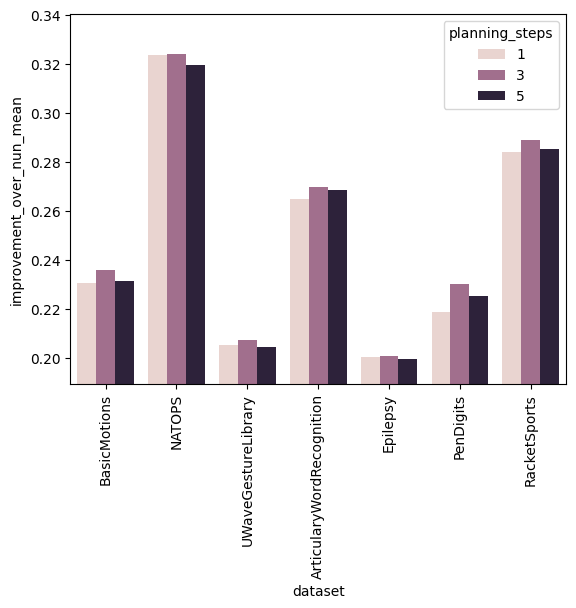

In [38]:
df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]"] 
# df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.1, 0.1], [0.05, 0.05]]"]
# df_aux_h = df_aux[df_aux["ts_ch_block_pcts"] == "[[0.2, 0.2], [0.2, 0.1], [0.2, 0.05], [0.1, 0.05], [0.05, 0.05]]"] 
ax = sns.barplot(df_aux_h, x="dataset", y="improvement_over_nun_mean", hue="planning_steps")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux_h["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

In [39]:
ds_mean=(df_aux_h.groupby(["dataset", "planning_steps"])["improvement_over_nun_mean"].mean().reset_index())
pivot=ds_mean.pivot(index="dataset", columns="planning_steps", values="improvement_over_nun_mean")

# deltas
deltas=pd.DataFrame({
    "delta_3_minus_1": pivot[3]-pivot[1],
    "delta_5_minus_1": pivot[5]-pivot[1]
}).dropna()

summary=pd.DataFrame({
    "mean": deltas.mean(),
    "std": deltas.std(ddof=1),
    "n": len(deltas)
})
summary["sem"]=summary["std"]/np.sqrt(summary["n"]) if summary["n"].iloc[0]>1 else 0.0
summary["ci95"]=1.96*summary["sem"]
print("\nPer-dataset deltas:")
print(deltas.to_string()[:1500])
print("\nSummary:")
print(summary.to_string())



Per-dataset deltas:
                           delta_3_minus_1  delta_5_minus_1
dataset                                                    
ArticularyWordRecognition         0.004748         0.003510
BasicMotions                      0.005369         0.000692
Epilepsy                          0.000620        -0.000812
NATOPS                            0.000545        -0.003937
PenDigits                         0.011392         0.006441
RacketSports                      0.004894         0.001277
UWaveGestureLibrary               0.002247        -0.000599

Summary:
                     mean       std  n       sem      ci95
delta_3_minus_1  0.004259  0.003738  7  0.001413  0.002769
delta_5_minus_1  0.000939  0.003323  7  0.001256  0.002462


In [40]:
long = (deltas.reset_index()
        .rename(columns={"index":"dataset"})
        .melt(id_vars="dataset", var_name="delta_type", value_name="delta"))
long["Delta in Planning Horizon"] = long["delta_type"].map({
    "delta_3_minus_1": "Δ(3−1)",
    "delta_5_minus_1": "Δ(5−1)"
})

In [41]:
long = long.replace({"ArticularyWordRecognition": "AWR", "UWaveGestureLibrary": "UWave"})

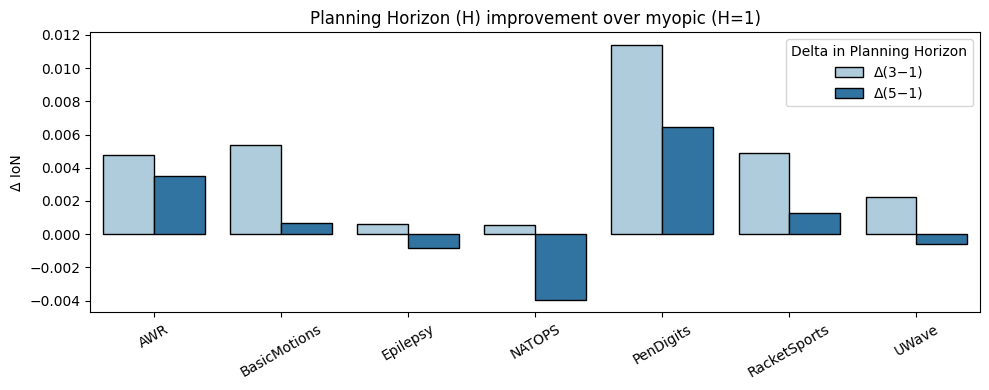

In [42]:
# Planning Horizon (H) improvement over myopic (H=!)
plt.figure(figsize=(10,4))
ax = sns.barplot(long, x="dataset", y="delta", hue="Delta in Planning Horizon", palette="Paired", edgecolor="black", linewidth=1.0)
ax.set_ylabel("Δ IoN")
ax.set_xlabel("")
plt.title("Planning Horizon (H) improvement over myopic (H=1)")
plt.xticks(rotation=30);
plt.tight_layout()

out_dir="./experiments/results/img_ablation_planning_delta.png"
plt.savefig(out_dir, dpi=300, bbox_inches="tight")

# Skip planning steps

In [43]:
experiment_folder = "hcem_sensitivity_skip_plau"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux = df_aux[["experiment_name", "dataset", "ts_ch_block_pcts", "plan_every", "improvement_over_nun_mean"]]

In [44]:
df_aux_h = df_aux[df_aux["ts_ch_block_pcts"]=="[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]"]

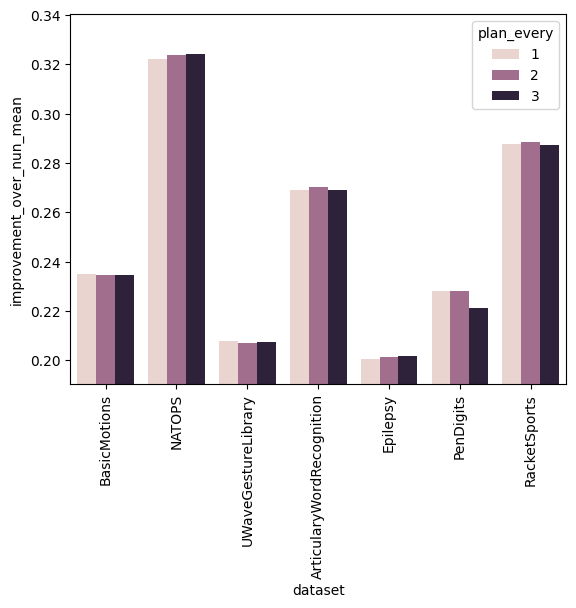

In [45]:
ax = sns.barplot(df_aux_h, x="dataset", y="improvement_over_nun_mean", hue="plan_every")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux_h["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

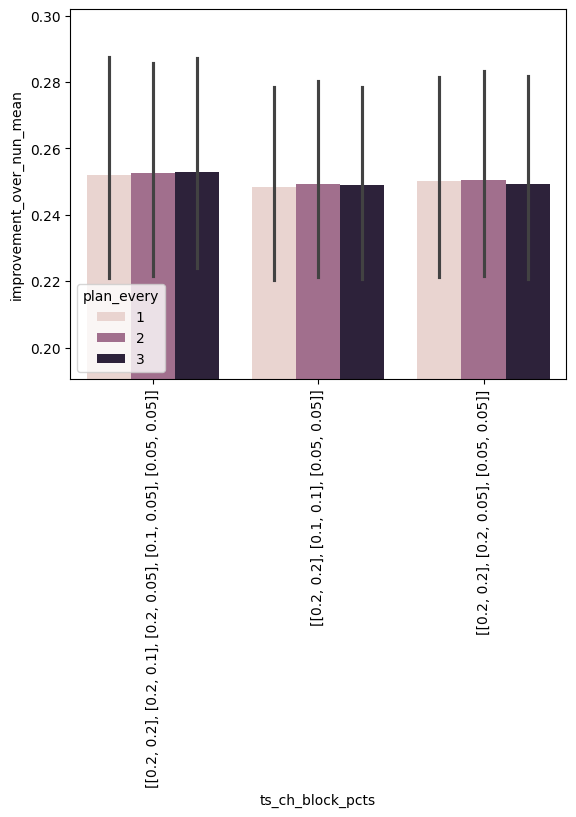

In [46]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue="plan_every")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux_h["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

# Only time dimention

In [39]:
experiment_folder = "hcem_sensitivity_hierarchies_univariate"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux = df_aux[["experiment_name", "dataset", "ts_ch_block_pcts", "improvement_over_nun_mean"]]

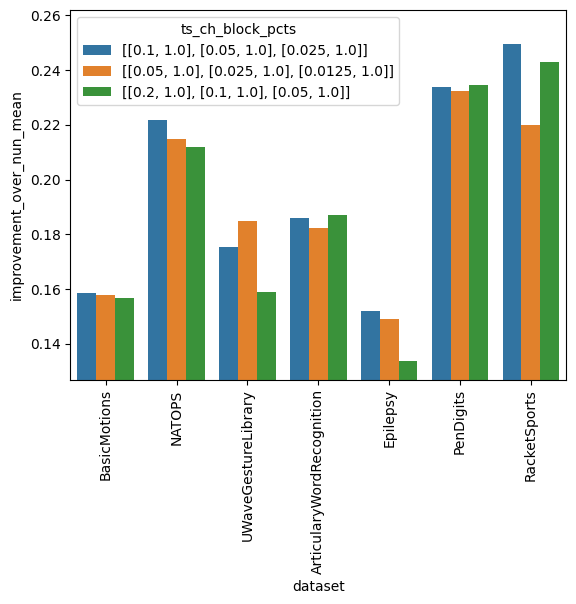

In [40]:
ax = sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="ts_ch_block_pcts")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

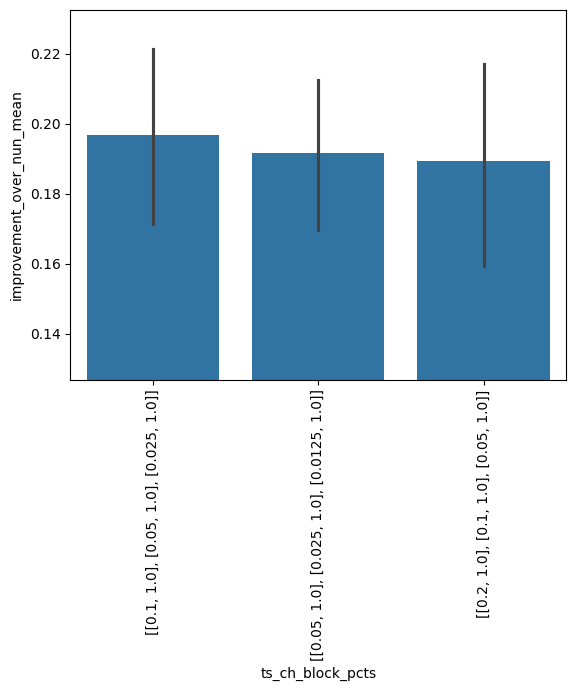

In [41]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

# Pruning

In [43]:
experiment_folder = "hcem_sensitivity_hierarchies_pruning_2"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux = df_aux[["experiment_name", "dataset", "pruning_ch_block_pct", "improvement_over_nun_mean"]]

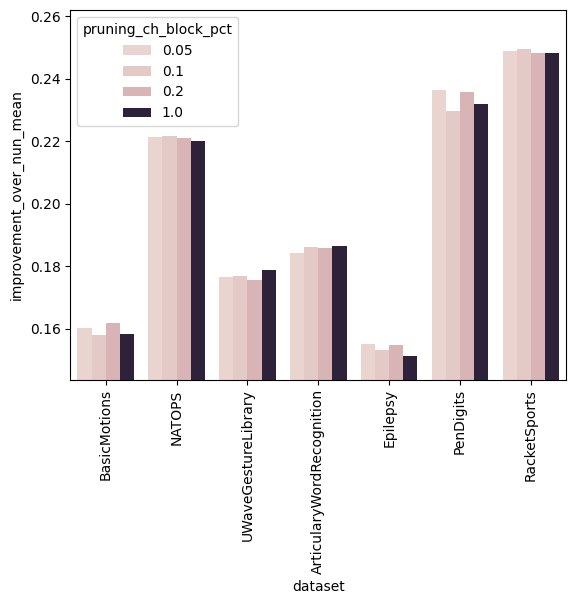

In [44]:
ax = sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="pruning_ch_block_pct")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);